In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2024 Global Military Expenditure Dataset.csv")
df.head()

,Country,Military Expenditure (USD billion),GDP (USD billion),Population (millions),Military Burden (%)
0,United States,997.0,29673,331,3.4
1,China,314.0,17734,1426,1.7
2,Russia,149.0,2100,145,7.1
3,Germany,88.5,5400,83,1.9
4,India,86.1,3700,1400,2.3


In [7]:
print(df.columns)

Index(['Country', 'Military Expenditure (USD billion)', 'GDP (USD billion)',
       'Population (millions)', 'Military Burden (%)'],
      dtype='object')


## What is the total global military expenditure in 2024?

Total Global Military Expenditure in 2024: $2520.60 Billion


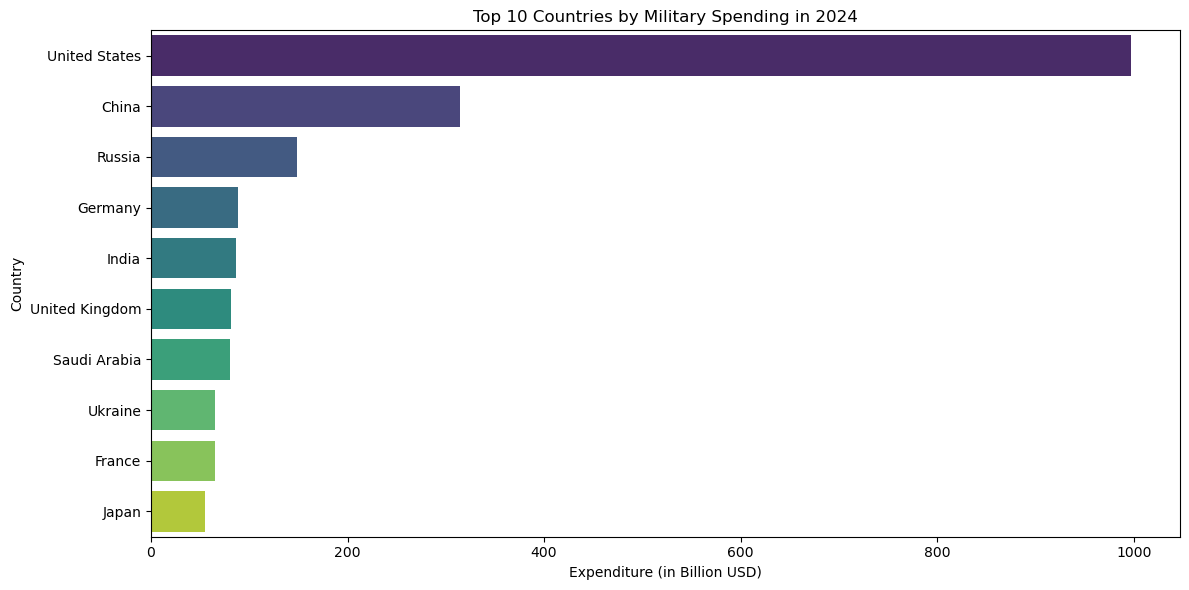

In [12]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop missing values in expenditure
df = df.dropna(subset=['Military Expenditure (USD billion)'])

# Total global expenditure
total_global = df['Military Expenditure (USD billion)'].sum()
print(f"Total Global Military Expenditure in 2024: ${total_global:.2f} Billion")

# Top 10 countries by spending
top10 = df.sort_values(by='Military Expenditure (USD billion)', ascending=False).head(10)

# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Military Expenditure (USD billion)', y='Country', hue='Country', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Countries by Military Spending in 2024')
plt.xlabel('Expenditure (in Billion USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Which countries have the highest military burden (% of GDP)?

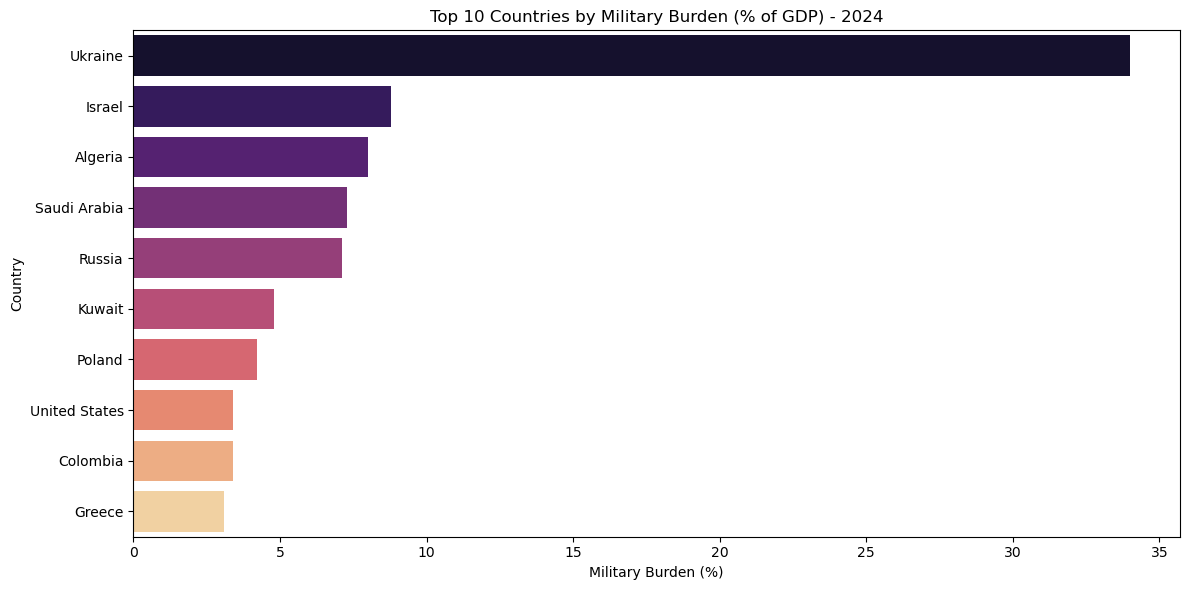

In [17]:
# Drop missing values in 'Military Burden (%)' column
df_burden = df.dropna(subset=['Military Burden (%)'])

# Sort countries by Military Burden (%)
top_burden = df_burden.sort_values(by='Military Burden (%)', ascending=False).head(10)

# Plot top 10 by burden
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_burden,
    x='Military Burden (%)',
    y='Country',
    hue='Country',
    palette='magma',
    dodge=False,
    legend=False
)
plt.title('Top 10 Countries by Military Burden (% of GDP) - 2024')
plt.xlabel('Military Burden (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Which countries have the highest per capita military spending in 2024?

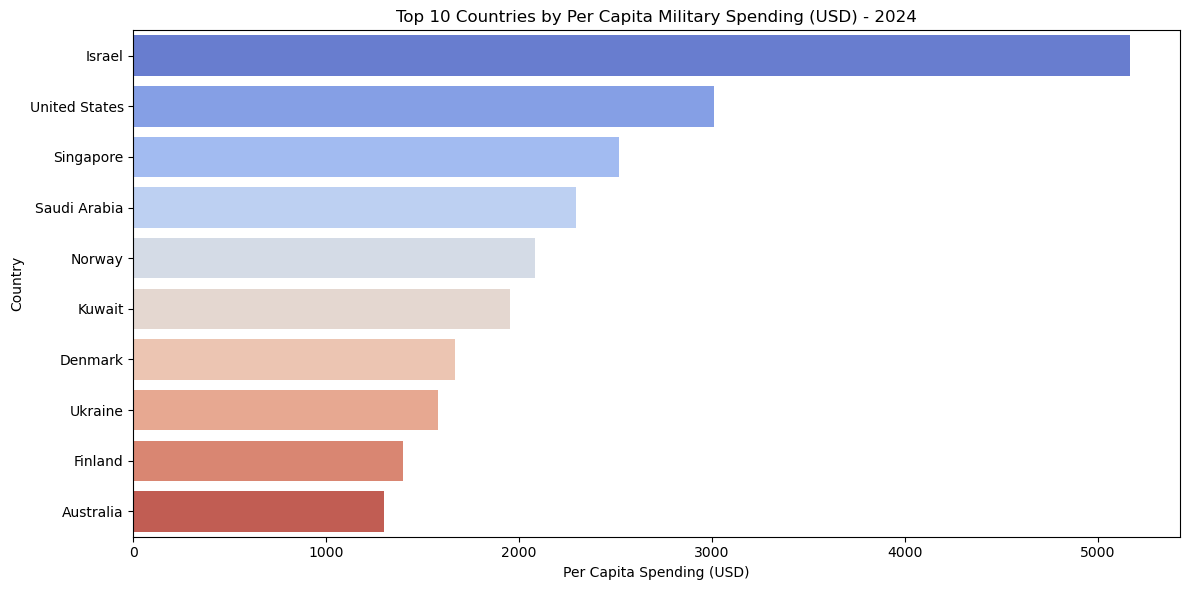

In [20]:
# Drop missing values in required columns
df_per_capita = df.dropna(subset=['Military Expenditure (USD billion)', 'Population (millions)'])

# Calculate per capita spending
df_per_capita['Per Capita Spending (USD)'] = (df_per_capita['Military Expenditure (USD billion)'] / df_per_capita['Population (millions)']) * 1000

# Top 10 countries by per capita spending
top_per_capita = df_per_capita.sort_values(by='Per Capita Spending (USD)', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_per_capita,
    x='Per Capita Spending (USD)',
    y='Country',
    hue='Country',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top 10 Countries by Per Capita Military Spending (USD) - 2024')
plt.xlabel('Per Capita Spending (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Which countries spend a lot on military despite having low GDPs?

   Country  Military Expenditure (USD billion)  GDP (USD billion)  \
34  Kuwait                                 7.8                 80   
38    Iraq                                 6.2                100   

    Spending vs GDP (%)  
34                 9.75  
38                 6.20  


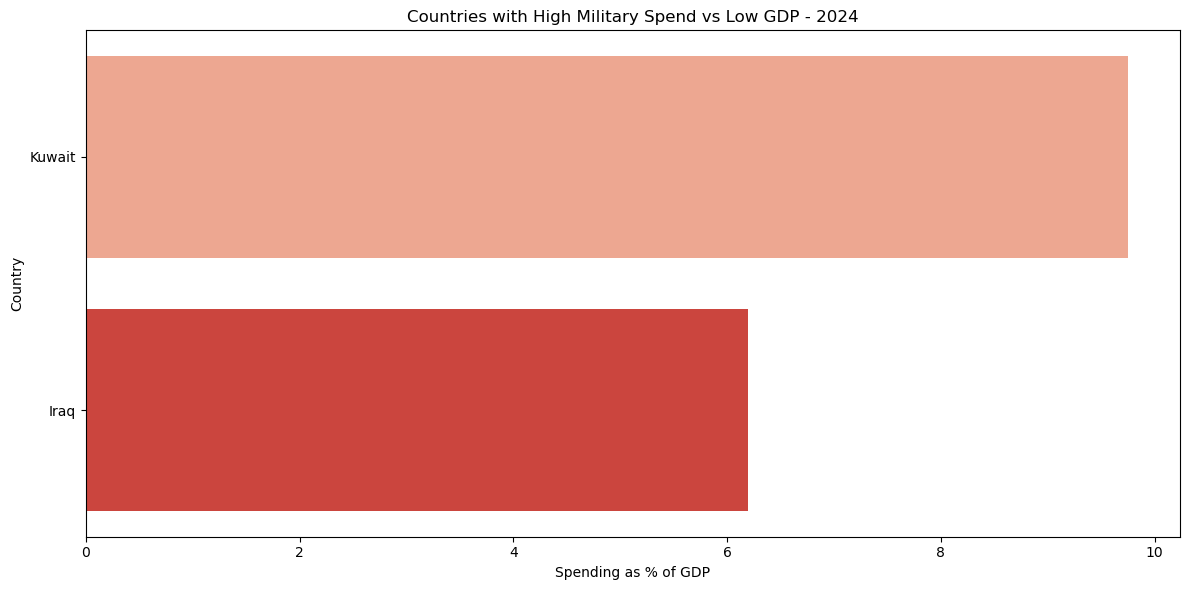

In [27]:
# Drop missing values
df_filtered = df.dropna(subset=['Military Expenditure (USD billion)', 'GDP (USD billion)'])

# Apply filter condition
burdened = burdened.copy()
burdened['Spending vs GDP (%)'] = (burdened['Military Expenditure (USD billion)'] / burdened['GDP (USD billion)']) * 100

# Sort by military burden (Expenditure / GDP)
burdened['Spending vs GDP (%)'] = (burdened['Military Expenditure (USD billion)'] / burdened['GDP (USD billion)']) * 100

# Sort by this ratio
burdened_sorted = burdened.sort_values(by='Spending vs GDP (%)', ascending=False)

# Show top results
print(burdened_sorted[['Country', 'Military Expenditure (USD billion)', 'GDP (USD billion)', 'Spending vs GDP (%)']])


plt.figure(figsize=(12,6))
sns.barplot(
    data=burdened_sorted.head(10),
    x='Spending vs GDP (%)',
    y='Country',
    hue='Country',
    palette='Reds',
    dodge=False,
    legend=False
)
plt.title('Countries with High Military Spend vs Low GDP - 2024')
plt.xlabel('Spending as % of GDP')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Is there a correlation between Military Expenditure and GDP?

Correlation between Military Expenditure and GDP: 0.95


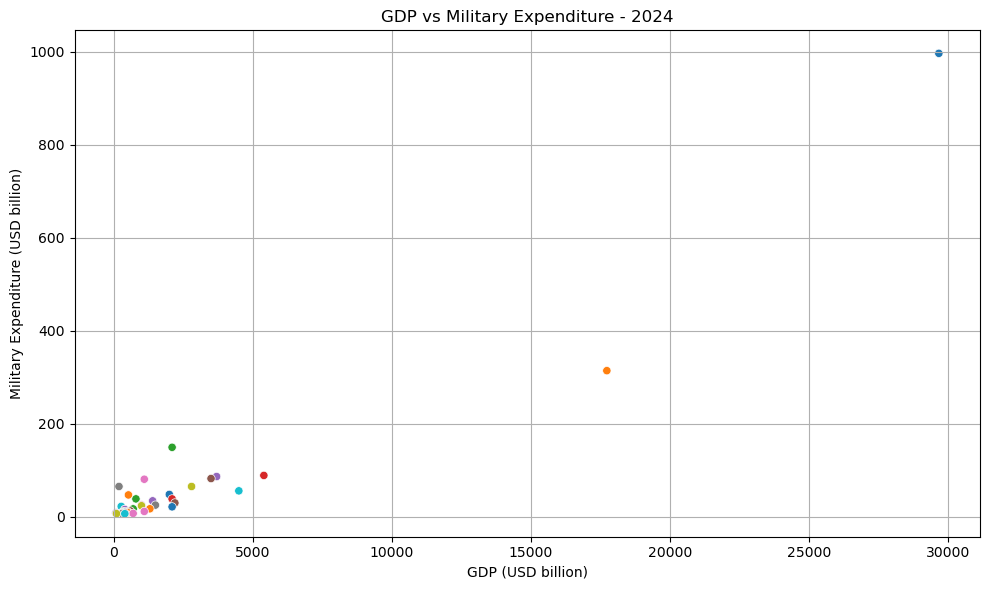

In [30]:
# Drop missing values in both columns
df_corr = df.dropna(subset=['Military Expenditure (USD billion)', 'GDP (USD billion)'])

# Check correlation
correlation = df_corr['Military Expenditure (USD billion)'].corr(df_corr['GDP (USD billion)'])
print(f"Correlation between Military Expenditure and GDP: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_corr,
    x='GDP (USD billion)',
    y='Military Expenditure (USD billion)',
    hue='Country',
    palette='tab10',
    legend=False
)
plt.title('GDP vs Military Expenditure - 2024')
plt.xlabel('GDP (USD billion)')
plt.ylabel('Military Expenditure (USD billion)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Which continent or region spends the most on military in 2024?

<Axes: ylabel='Continent'>

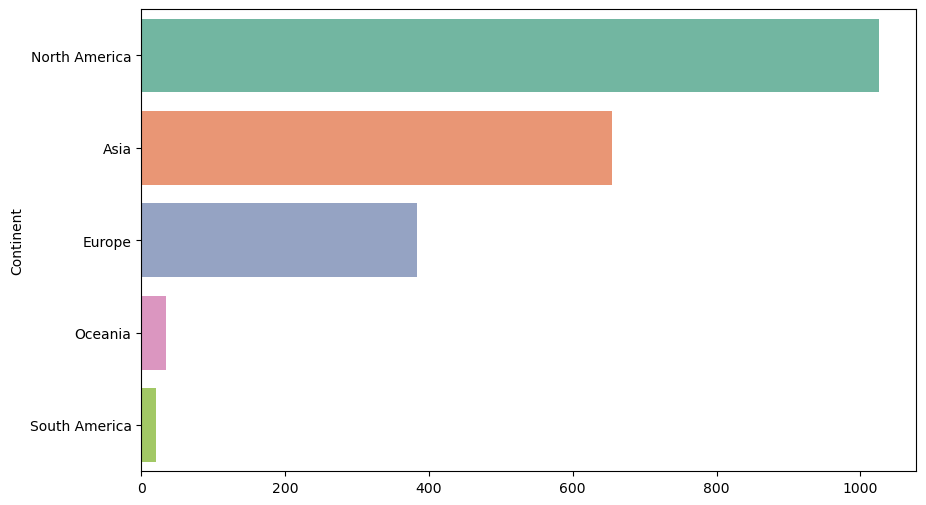

In [60]:
# country to continent mapping
continent_map = {
    'United States': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Russia': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Australia': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Canada': 'North America',
    'South Korea': 'Asia',
    'Israel': 'Asia',
    'Turkey': 'Asia',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
}

# Map to new column
df['Continent'] = df['Country'].map(continent_map)

# Drop missing values (where continent is not mapped)
df_continent = df.dropna(subset=['Continent', 'Military Expenditure (USD billion)'])

# Group by continent and sum spending
continent_spending = df_continent.groupby('Continent')['Military Expenditure (USD billion)'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=continent_spending.values,
    y=continent_spending.index,
    hue = continent_spending.index,
    palette='Set2'
)

## Bottom 10 countries with least military spending in 2024

Bottom 10 countries by military expenditure in 2024:


,Country,Military Expenditure (USD billion)
39,Philippines,6.1
38,Iraq,6.2
37,Czechia,6.5
36,Switzerland,6.7
35,Finland,7.0
34,Kuwait,7.8
33,Iran,7.9
32,Greece,8.0
31,Belgium,8.6
30,Romania,8.7


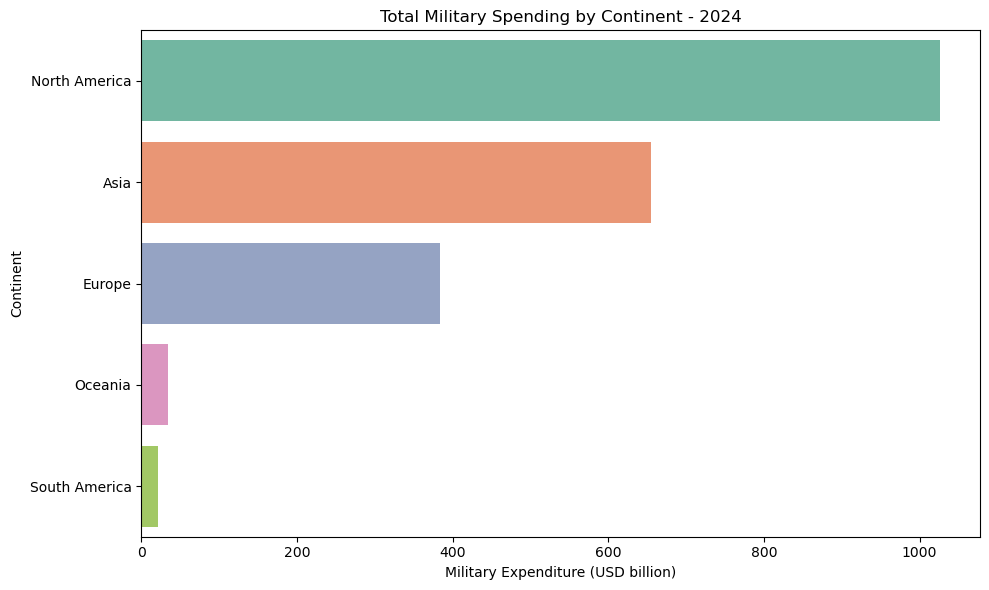

In [62]:
# Sort by Military Expenditure and take bottom 10
bottom10 = df.sort_values('Military Expenditure (USD billion)').head(10)

# Display
print("Bottom 10 countries by military expenditure in 2024:")
display(bottom10[['Country', 'Military Expenditure (USD billion)']])

# Convert Series to DataFrame
df_continent = continent_spending.reset_index()
df_continent.columns = ['Continent', 'Expenditure']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_continent,
    x='Expenditure',
    y='Continent',
    hue='Continent',
    palette='Set2',
    legend=False
)
plt.title('Total Military Spending by Continent - 2024')
plt.xlabel('Military Expenditure (USD billion)')
plt.ylabel('Continent')
plt.tight_layout()
plt.show()

## Is there a correlation between Military Spending and GDP?

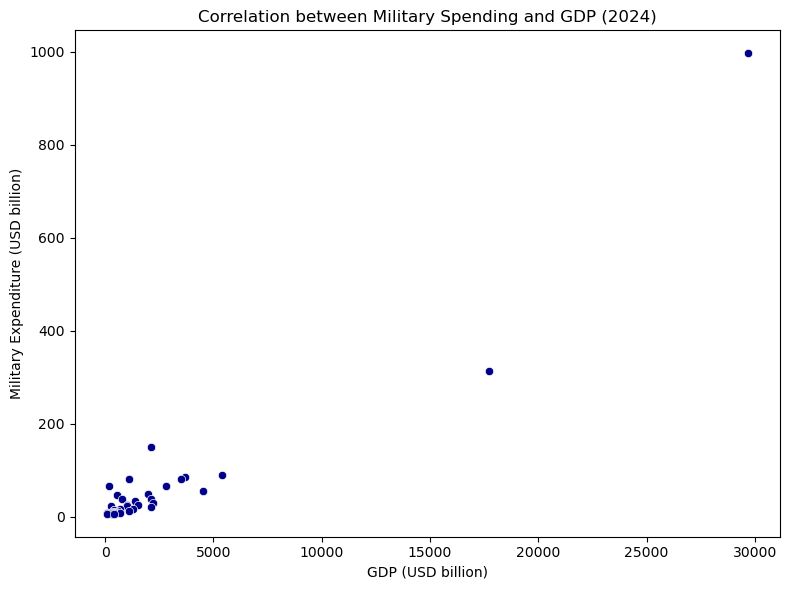

Correlation Coefficient: 0.95


In [65]:
# Drop rows with missing GDP or Expenditure
corr_df = df[['Military Expenditure (USD billion)', 'GDP (USD billion)']].dropna()

# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=corr_df,
    x='GDP (USD billion)',
    y='Military Expenditure (USD billion)',
    color='darkblue'
)
plt.title('Correlation between Military Spending and GDP (2024)')
plt.xlabel('GDP (USD billion)')
plt.ylabel('Military Expenditure (USD billion)')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = corr_df['Military Expenditure (USD billion)'].corr(corr_df['GDP (USD billion)'])
print(f"Correlation Coefficient: {correlation:.2f}")

## Which countries spend the highest % of their GDP on military? (Top 10 Military Burden)

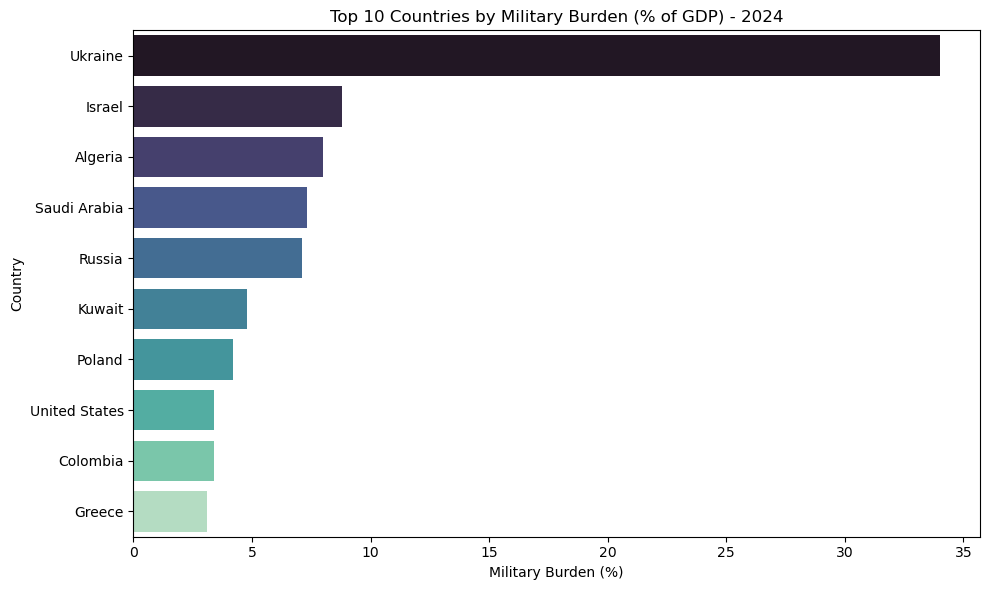

In [74]:
# Drop missing values in Military Burden column
burden_df = df[['Country', 'Military Burden (%)']].dropna()

# Sort and get top 10
top_burden = burden_df.sort_values(by='Military Burden (%)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_burden,
    x='Military Burden (%)',
    y='Country',
    hue='Country',
    palette='mako',
    legend=False
)
plt.title('Top 10 Countries by Military Burden (% of GDP) - 2024')
plt.xlabel('Military Burden (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Which countries spend the most on military per person (Per Capita Military Spending)?

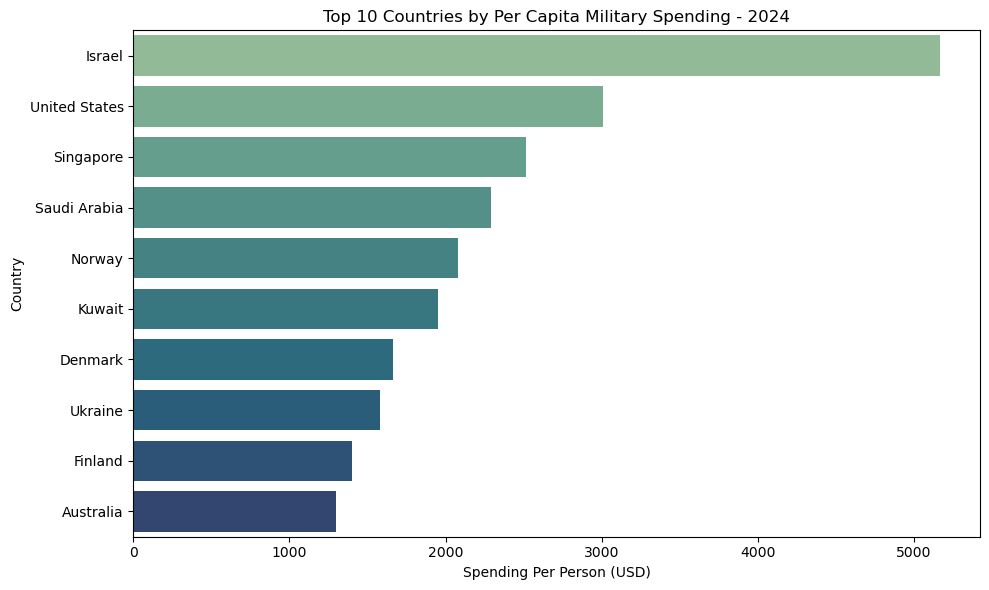

In [77]:
# Per Capita Military Spending
df['Per Capita Military Spending'] = (df['Military Expenditure (USD billion)'] * 1e9) / (df['Population (millions)'] * 1e6)

# Drop missing values
per_capita = df[['Country', 'Per Capita Military Spending']].dropna()

# Sort and get top 10 countries
top_per_capita = per_capita.sort_values(by='Per Capita Military Spending', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_per_capita,
    x='Per Capita Military Spending',
    y='Country',
    hue='Country',
    palette='crest',
    legend=False
)
plt.title('Top 10 Countries by Per Capita Military Spending - 2024')
plt.xlabel('Spending Per Person (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Which continent spends the most on military per person (Per Capita Military Spending by Continent)?

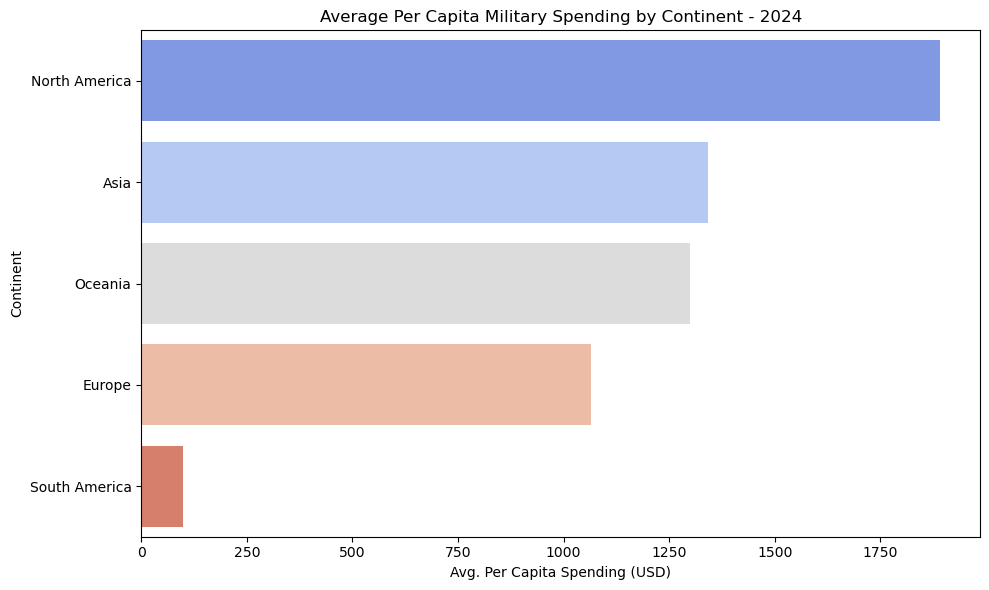

In [88]:
# Calculate per capita spending if not already done
df['Per Capita Military Spending'] = (df['Military Expenditure (USD billion)'] * 1e9) / (df['Population (millions)'] * 1e6)

# Group by continent and calculate average per capita spending
continent_per_capita = df.groupby('Continent')['Per Capita Military Spending'].mean().sort_values(ascending=False)


df_plot = continent_per_capita.reset_index()
df_plot.columns = ['Continent', 'Avg Per Capita Military Spending']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x='Avg Per Capita Military Spending',
    y='Continent',
    hue='Continent',
    palette='coolwarm',
    legend=False
)
plt.title('Average Per Capita Military Spending by Continent - 2024')
plt.xlabel('Avg. Per Capita Spending (USD)')
plt.ylabel('Continent')
plt.tight_layout()
plt.show()

## Which continent has the highest military spending per capita (per person), and how does it compare to others?

In [91]:
# Group by continent and calculate total military spending and total population
continent_group = df.groupby('Continent').agg({
    'Military Expenditure (USD billion)': 'sum',
    'Population (millions)': 'sum'
})

# Calculate per capita military spending
continent_group['Per Capita Spending (USD)'] = (
    (continent_group['Military Expenditure (USD billion)'] * 1e9) / 
    (continent_group['Population (millions)'] * 1e6)
).round(2)

# Sort descending
continent_group_sorted = continent_group.sort_values(by='Per Capita Spending (USD)', ascending=False)

# Display table
display(continent_group_sorted[['Per Capita Spending (USD)']])

,Per Capita Spending (USD)
Continent,
North America,2781.30
Oceania,1300.00
Europe,1057.85
Asia,209.07
South America,98.12


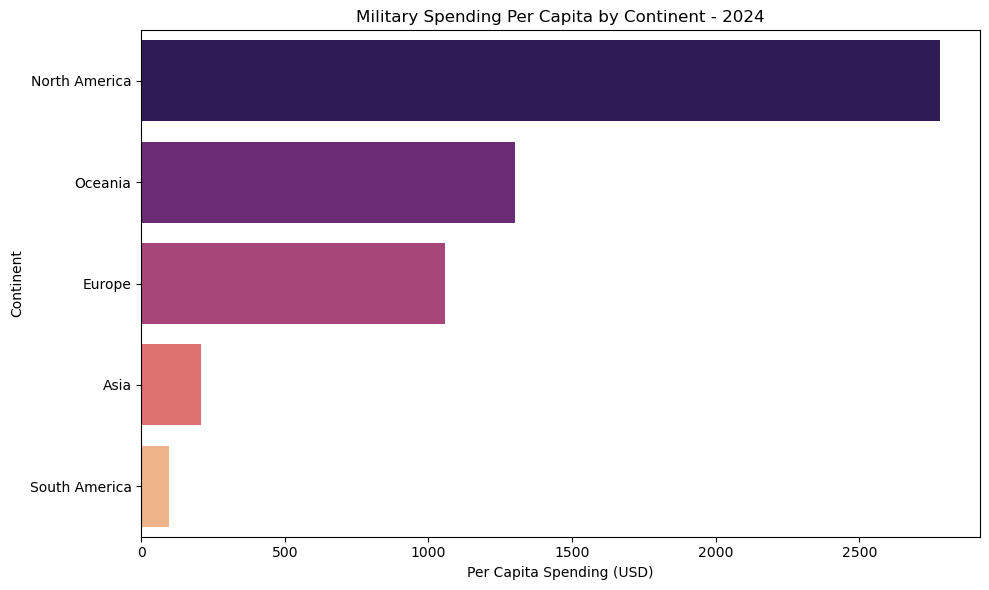

In [93]:
# Reset index for plotting
df_plot = continent_group_sorted[['Per Capita Spending (USD)']].reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x='Per Capita Spending (USD)',
    y='Continent',
    hue='Continent',
    palette='magma',
    legend=False
)
plt.title('Military Spending Per Capita by Continent - 2024')
plt.xlabel('Per Capita Spending (USD)')
plt.ylabel('Continent')
plt.tight_layout()
plt.show()